In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [6]:
data = pd.read_csv("churn_data.csv")
print(data.head())


   ID  Gender  SeniorCitizen Married  Tenure PhoneService MultipleLines  \
0   0  Female              0     Yes       1           No            No   
1   1    Male              0      No      34          Yes            No   
2   2    Male              0      No       2          Yes            No   
3   3    Male              0      No      45           No            No   
4   4  Female              0      No       2          Yes            No   

  InternetService TechSupport StreamingTV StreamingMovies        Contract  \
0             DSL          No          No              No  Month-to-month   
1             DSL          No          No              No        One year   
2             DSL          No          No              No  Month-to-month   
3             DSL         Yes          No              No        One year   
4     Fiber optic          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0      

In [8]:
# Check for missing values
print(data.info())
print(data.isnull().sum())

# Drop irrelevant columns (e.g., customerID is not useful for predictions)
data.drop(['ID'], axis=1, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                126 non-null    int64  
 1   Gender            126 non-null    object 
 2   SeniorCitizen     126 non-null    int64  
 3   Married           126 non-null    object 
 4   Tenure            126 non-null    int64  
 5   PhoneService      126 non-null    object 
 6   MultipleLines     126 non-null    object 
 7   InternetService   126 non-null    object 
 8   TechSupport       126 non-null    object 
 9   StreamingTV       126 non-null    object 
 10  StreamingMovies   126 non-null    object 
 11  Contract          126 non-null    object 
 12  PaperlessBilling  126 non-null    object 
 13  PaymentMethod     126 non-null    object 
 14  MonthlyCharges    126 non-null    float64
 15  TotalCharges      126 non-null    float64
 16  Churn             126 non-null    object 
dt

In [9]:
# Replace missing TotalCharges with the median
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


<ipython-input-9-b3962476cb56>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [10]:
# Convert categorical variables to numerical values
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


In [12]:
# Scale numerical features
scaler = StandardScaler()
numeric_columns = ['Tenure', 'MonthlyCharges', 'TotalCharges']
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])


In [13]:
# Define features (X) and target variable (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [22]:
# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))
print("Accuracy Score:",accuracy_score(y_test, y_pred_log))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        22
           1       1.00      0.25      0.40        16

    accuracy                           0.68        38
   macro avg       0.82      0.62      0.59        38
weighted avg       0.80      0.68      0.62        38

Accuracy Score: 0.6842105263157895


In [23]:
# Train Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt.predict(X_test)
print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy Score:",accuracy_score(y_test, y_pred_dt))

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.66      0.95      0.78        22
           1       0.83      0.31      0.45        16

    accuracy                           0.68        38
   macro avg       0.74      0.63      0.62        38
weighted avg       0.73      0.68      0.64        38

Accuracy Score: 0.6842105263157895


In [24]:
# Train Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy Score:",accuracy_score(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.66      0.95      0.78        22
           1       0.83      0.31      0.45        16

    accuracy                           0.68        38
   macro avg       0.74      0.63      0.62        38
weighted avg       0.73      0.68      0.64        38

Accuracy Score: 0.6842105263157895


In [25]:
# Train Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm.predict(X_test)
print("Support Vector Machine Performance:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy Score:",accuracy_score(y_test, y_pred_svm))

Support Vector Machine Performance:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        22
           1       1.00      0.19      0.32        16

    accuracy                           0.66        38
   macro avg       0.81      0.59      0.54        38
weighted avg       0.78      0.66      0.58        38

Accuracy Score: 0.6578947368421053


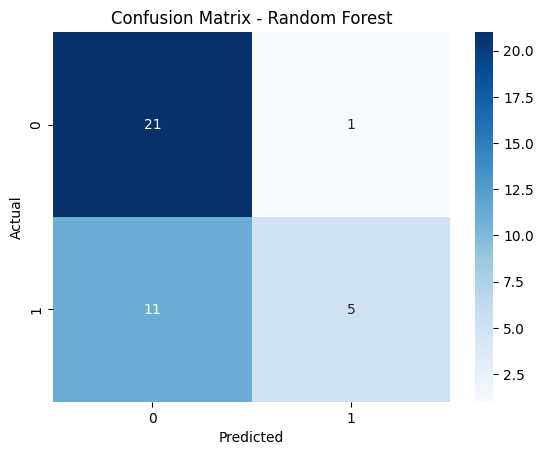

Logistic Regression Accuracy: 0.68
Decision Tree Accuracy: 0.68
Random Forest Accuracy: 0.68
SVM Accuracy: 0.66


In [26]:
# Plot confusion matrix for the best model (e.g., Random Forest)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print Accuracy Scores
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.2f}")
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")


In [37]:
# Example of new data
new_data = pd.DataFrame({
    'Gender': [1], 'SeniorCitizen': [0], 'Married': [1],
    'Tenure': [12], 'PhoneService': [1], 'MultipleLines': [0],
    'InternetService': [1], 'TechSupport': [0], 'StreamingTV': [1],
    'StreamingMovies': [0], 'Contract': [1], 'PaperlessBilling': [1],
    'PaymentMethod': [1], 'MonthlyCharges': [50.5], 'TotalCharges': [605.5]
})

# Preprocess and scale new data
new_data[numeric_columns] = scaler.transform(new_data[numeric_columns])

# Predict churn
prediction = rf.predict(new_data)
print("Churn Prediction:", "Yes" if prediction[0] == 1 else "No")

Churn Prediction: No
